The KC house dataset contains information about houses sold between May 2014 and May 2015 in King County, Washington. The dataset consisted of 21 variables and 21613 observations.

We will study the data and predict the price of the houses.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set()

In [20]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df_full = df.copy()
target = df['price']
df.drop(['id', 'date', 'price'], axis=1, inplace=True)
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')

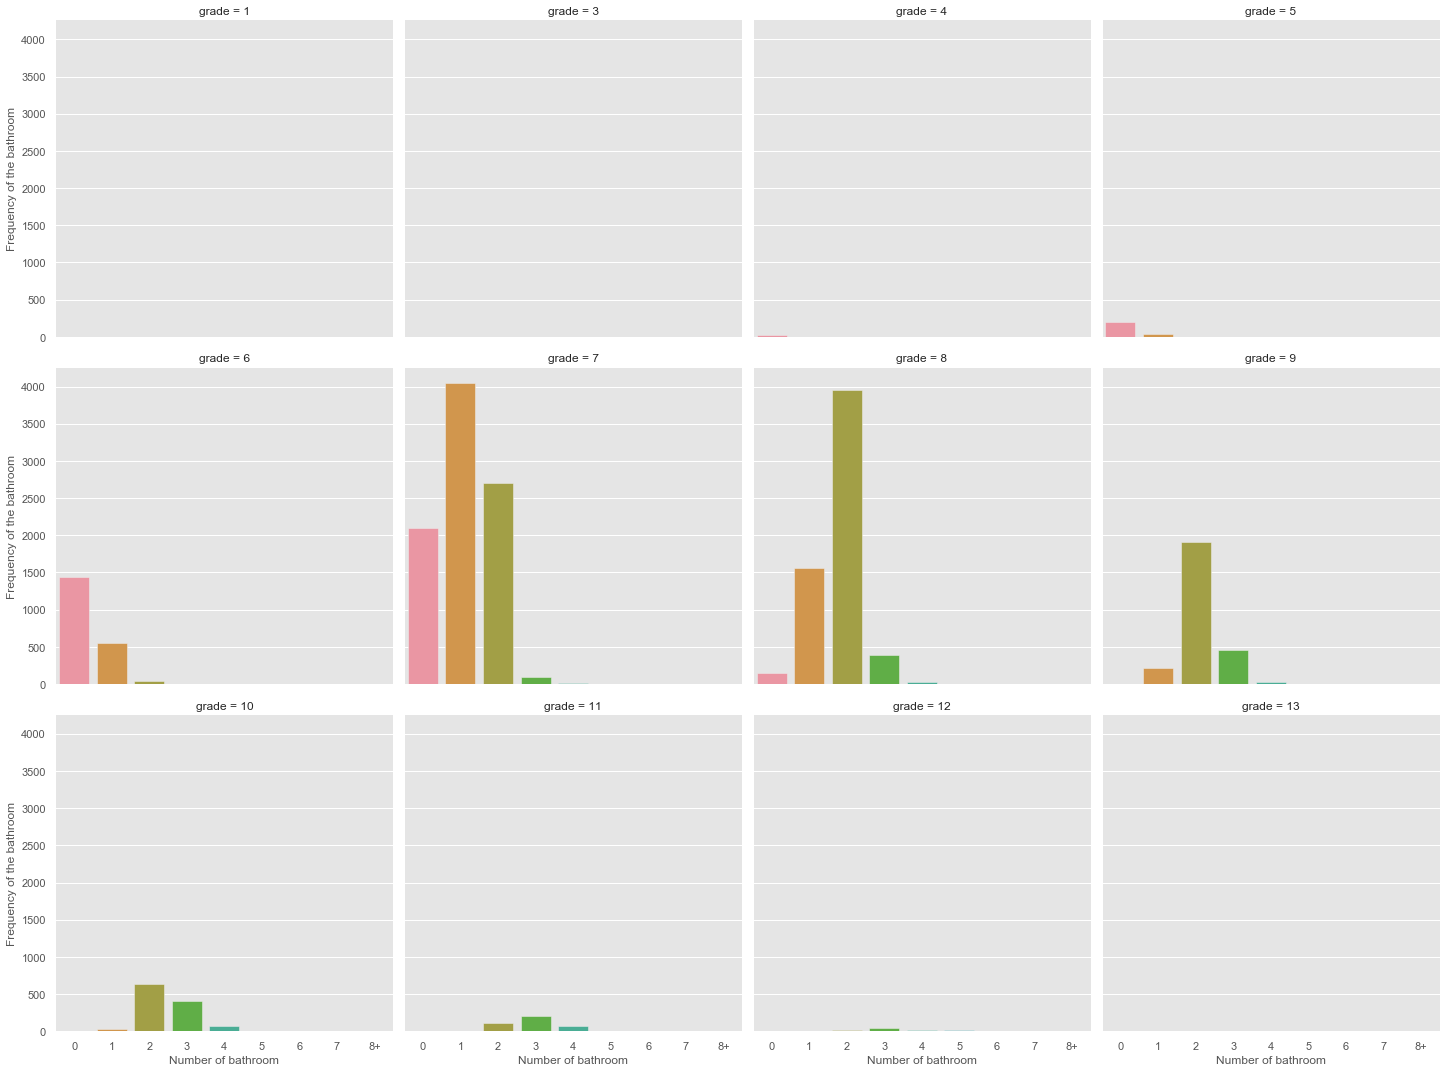

In [23]:
# Checking the impact of bathroom in grades

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, np.inf]
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
df['bathrooms range'] = pd.cut(df['bathrooms'], bins=bins, labels=label)
ax_bath = sns.catplot('bathrooms range', data=df, kind='count',col='grade', height=5, aspect=1, col_wrap=4)
ax_bath.set_axis_labels('Number of bathroom', 'Frequency of the bathroom')
plt.show()

Text(0.5, 1, 'HEAT MAP showing features correlation')

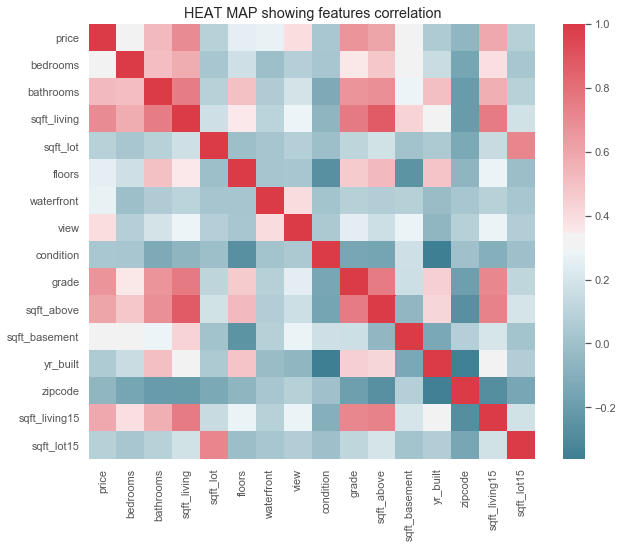

In [24]:
# Checking correlation among features

df_heat_map = df_full.copy()
for col in ['id', 'date', 'lat', 'long', 'yr_renovated']:
    del df_heat_map[col]
_,ax=plt.subplots(figsize=(10,8))
colormap=sns.diverging_palette(220,10,as_cmap=True)
ax_heat = sns.heatmap(df_heat_map.corr(), cmap=colormap)
ax_heat.set_title('HEAT MAP showing features correlation')

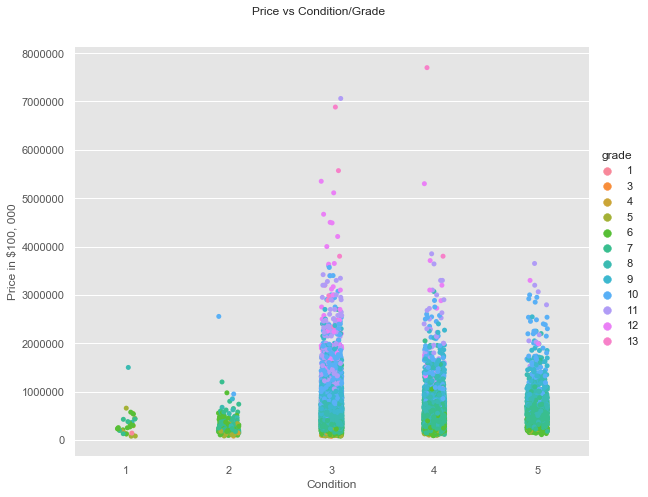

In [25]:
# Price vs Condition and Grade

ax_condition = sns.catplot('condition', 'price', data=df_full, hue='grade', height=7, aspect=1.2)
ax_condition.set_axis_labels('Condition', 'Price in $100, 000')
plt.subplots_adjust(top=0.9)
ax_condition.fig.suptitle('Price vs Condition/Grade')
plt.show()

In [28]:
df_full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,Oct
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,Dec
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,Feb
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,Dec
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,Feb


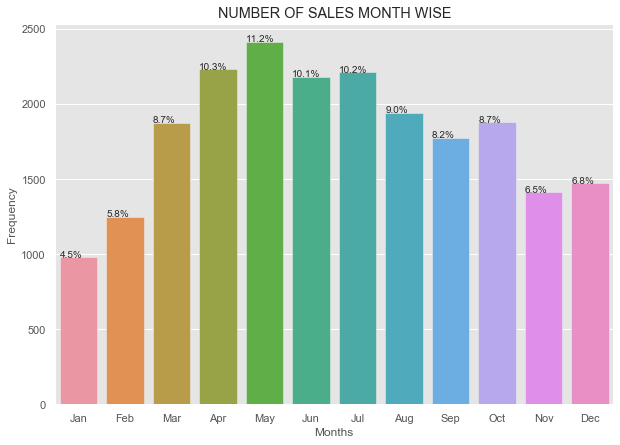

In [29]:
# Bar plot showing number of sales month wise

df_full['date'] = pd.to_datetime(df_full['date'])
df_full['month'] = df_full.date.dt.strftime('%b')
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot('month', data=df_full, order=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], orient='h')
total = len(df_full['month'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width() - 0.8
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
ax.set_xlabel('Months')
ax.set_ylabel('Frequency')
ax.set_title('NUMBER OF SALES MONTH WISE')
plt.show()

In [31]:
df_full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,Oct
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,Dec
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,Feb
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,Dec
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,Feb


In [32]:
df_full = df_full.sort_values('date')
df_date = pd.DataFrame(df_full.date.value_counts().sort_index())
df_date = df_date.resample('W').mean()

In [30]:
# Weekly sales time series graph

!pip install plotly
import plotly.express as px
ax_pl = px.line(df_date, df_date.index, df_date.date)
ax_pl.update_xaxes(title_text='Date', tickangle=-45)
ax_pl.update_yaxes(title_text='Sales Frequency')
ax_pl.update_layout(title='Sales Weekly')
ax_pl.show()

In [33]:
df_ml = df.drop('bathrooms range', axis=1)
target = np.log(target)
x_train, x_test, y_train, y_test = train_test_split(df_ml, target, test_size=0.2, random_state=42)

In [34]:
# We will use random forest model for this problem

model = RandomForestRegressor()
model.fit(x_train, y_train)
print(f"The R-squared test score of the model is {model.score(x_test, y_test)}")
y_pred = model.predict(x_test)
print(f"The mean squared test error of the model is {mean_squared_error(y_test, y_pred)}")

The R-squared test score of the model is 0.8892366727143506
The mean squared test error of the model is 0.03157109685367937


We can try improving the model using different feature engineering techniques, hyperparameter tuning, trying other machine learning models or even getting some more data if possible.